In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# READING DATASET

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Dataset.csv')

In [7]:
df.head()

,Unnamed: 0,asin,Brand,Item,name,rate,date,verified,title,body,helpfulVotes
0,0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,Janet,NEUTRAL,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,1,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,Luke Wyatt,NEGATIVE,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,2,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,Brooke,POSITIVE,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,3,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,amy m. teague,NEUTRAL,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,4,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,tristazbimmer,POSITIVE,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


#CHECK FOR NULL VALUES

In [8]:
df.isna().sum()

Unnamed: 0          0
asin                0
Brand               0
Item                0
name                2
rate                0
date                0
verified            0
title              14
body               21
helpfulVotes    40771
dtype: int64

#REMOVING UNWANTED COLUMNS

In [9]:
df['text'] = df['title']+ ' ' + df['body']

In [10]:
df.head()

,Unnamed: 0,asin,Brand,Item,name,rate,date,verified,title,body,helpfulVotes,text
0,0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,Janet,NEUTRAL,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,"Def not best, but not worst I had the Samsung ..."
1,1,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,Luke Wyatt,NEGATIVE,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Text Messaging Doesn't Work Due to a software ...
2,2,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,Brooke,POSITIVE,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,"Love This Phone This is a great, reliable phon..."
3,3,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,amy m. teague,NEUTRAL,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,"Love the Phone, BUT...! I love the phone and a..."
4,4,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,tristazbimmer,POSITIVE,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,"Great phone service and options, lousy case! T..."


In [11]:
df1 = df.drop(['Unnamed: 0','asin','Item','Brand','name','date','verified','helpfulVotes','title','body'], axis=1)

In [12]:
df1.head()

,rate,text
0,NEUTRAL,"Def not best, but not worst I had the Samsung ..."
1,NEGATIVE,Text Messaging Doesn't Work Due to a software ...
2,POSITIVE,"Love This Phone This is a great, reliable phon..."
3,NEUTRAL,"Love the Phone, BUT...! I love the phone and a..."
4,POSITIVE,"Great phone service and options, lousy case! T..."


In [13]:
#Checking shape of dataset
df1.shape

(67986, 2)

In [14]:
#Checking total Brands in Dataset
#df1.Brand.value_counts()

#REMOVING NULL ROWS

In [15]:
df1 = df1.dropna(subset=['text'])

In [16]:
df1.head()

,rate,text
0,NEUTRAL,"Def not best, but not worst I had the Samsung ..."
1,NEGATIVE,Text Messaging Doesn't Work Due to a software ...
2,POSITIVE,"Love This Phone This is a great, reliable phon..."
3,NEUTRAL,"Love the Phone, BUT...! I love the phone and a..."
4,POSITIVE,"Great phone service and options, lousy case! T..."


In [17]:
df1.isna().sum()

rate    0
text    0
dtype: int64

In [18]:
## Check duplicate
df1.duplicated().sum()

5675

In [19]:
#Check the distribution of TARGET column
df1['rate'].value_counts()

POSITIVE    46553
NEGATIVE    16651
NEUTRAL      4752
Name: rate, dtype: int64

#DENOISE THE BODY

In [20]:
from bs4 import BeautifulSoup
import re

In [21]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [22]:
#Apply function on Body column
df1['text'] = df1['text'].apply(denoise_text)

In [23]:
df1.head()

,rate,text
0,NEUTRAL,"Def not best, but not worst I had the Samsung ..."
1,NEGATIVE,Text Messaging Doesn't Work Due to a software ...
2,POSITIVE,"Love This Phone This is a great, reliable phon..."
3,NEUTRAL,"Love the Phone, BUT...! I love the phone and a..."
4,POSITIVE,"Great phone service and options, lousy case! T..."


#REMOVING SPECIAL CHARACTERS

In [24]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\^^", "", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    return text

In [25]:
#Apply function on body column
df1['text'] = df1['text'].apply(remove_special_characters)

In [26]:
df1.head()

,rate,text
0,NEUTRAL,Def not best but not worst I had the Samsung A...
1,NEGATIVE,Text Messaging Doesnt Work Due to a software i...
2,POSITIVE,Love This Phone This is a great reliable phone...
3,NEUTRAL,Love the Phone BUT I love the phone and all be...
4,POSITIVE,Great phone service and options lousy case The...


#APPLY LEMMATIZER

In [27]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [28]:
#Lematizing the text
def word_lemman(text):
    ln = WordNetLemmatizer()
    text= ' '.join([ln.lemmatize(word) for word in text.split()])
    return text

In [29]:
df1['text'] = df1['text'].apply(word_lemman)

In [30]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [31]:
#df1['text'] = df1['text'].apply(simple_stemmer)

In [32]:
df1.head()

,rate,text
0,NEUTRAL,Def not best but not worst I had the Samsung A...
1,NEGATIVE,Text Messaging Doesnt Work Due to a software i...
2,POSITIVE,Love This Phone This is a great reliable phone...
3,NEUTRAL,Love the Phone BUT I love the phone and all be...
4,POSITIVE,Great phone service and option lousy case The ...


#VECTORIZATION

In [33]:
# importing simple_preprocess
from gensim.utils import simple_preprocess

In [34]:
# preprocess all the articles of the data set
token_text = df1.text.apply(lambda x: simple_preprocess(x))

In [35]:
#df1['text1'] = token_text

In [36]:
df1.head()

,rate,text
0,NEUTRAL,Def not best but not worst I had the Samsung A...
1,NEGATIVE,Text Messaging Doesnt Work Due to a software i...
2,POSITIVE,Love This Phone This is a great reliable phone...
3,NEUTRAL,Love the Phone BUT I love the phone and all be...
4,POSITIVE,Great phone service and option lousy case The ...


#SPELLING CORRECTION

In [37]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 34.6 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622383 sha256=0d490fc4701f92bea75ee326f426aa89a289323f1d7c3450a50b22dec4a0ddfc
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [38]:
from autocorrect import Speller

In [39]:
spell = Speller(lang='en')

In [40]:
def correct_spelling(tokens):
    sentence_corrected = ' '.join([spell(word) for word in tokens])
    return sentence_corrected

In [41]:
#df1['text1'] = df1['text1'].apply(correct_spelling)

In [42]:
df1.head()

,rate,text
0,NEUTRAL,Def not best but not worst I had the Samsung A...
1,NEGATIVE,Text Messaging Doesnt Work Due to a software i...
2,POSITIVE,Love This Phone This is a great reliable phone...
3,NEUTRAL,Love the Phone BUT I love the phone and all be...
4,POSITIVE,Great phone service and option lousy case The ...


#STOP WORDS REMOVAL

In [43]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
stop_words = stopwords.words('english')

In [45]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df1['text'] = df1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [46]:
df1.head()

,rate,text
0,NEUTRAL,Def best worst I Samsung A600 awhile absolute ...
1,NEGATIVE,Text Messaging Doesnt Work Due software issue ...
2,POSITIVE,Love This Phone This great reliable phone I al...
3,NEUTRAL,Love Phone BUT I love phone I really need one ...
4,POSITIVE,Great phone service option lousy case The phon...


#BAG OF WORDS

In [47]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,ENGLISH_STOP_WORDS

In [48]:
bow = CountVectorizer()
X_bow = bow.fit_transform(df1['text'])

In [49]:
f1 = bow.get_feature_names_out()

In [50]:
f1

array(['00', '000', '00000', ..., 'zx2', 'zx3', 'zz3'], dtype=object)

In [51]:
len(f1)

47241

In [52]:
bow2 = CountVectorizer(analyzer='word', ngram_range=(1, 1),max_features=100)

In [53]:
X_bow2 = bow2.fit_transform(df1['text'])

In [54]:
f2 = bow2.get_feature_names_out()

In [55]:
f2

array(['also', 'amazing', 'android', 'apps', 'att', 'back', 'battery',
       'best', 'better', 'bought', 'buy', 'call', 'came', 'camera',
       'cant', 'card', 'case', 'charge', 'charger', 'could', 'day',
       'device', 'didnt', 'doe', 'doesnt', 'dont', 'even', 'everything',
       'excellent', 'far', 'fast', 'feature', 'first', 'five', 'galaxy',
       'get', 'go', 'good', 'got', 'great', 'ha', 'happy', 'if', 'im',
       'iphone', 'issue', 'it', 'its', 'ive', 'last', 'life', 'like',
       'look', 'love', 'make', 'money', 'month', 'much', 'my', 'need',
       'new', 'nice', 'no', 'not', 'note', 'one', 'perfect', 'phone',
       'price', 'problem', 'product', 'quality', 'really', 'review',
       'samsung', 'say', 'screen', 'sim', 'so', 'stars', 'still', 'take',
       'the', 'thing', 'this', 'time', 'unlocked', 'update', 'use',
       'used', 'using', 'verizon', 'very', 'wa', 'want', 'well', 'work',
       'working', 'would', 'year'], dtype=object)

In [56]:
data = pd.DataFrame(f2, columns = ['Keywords'])

In [57]:
data.head()

,Keywords
0,also
1,amazing
2,android
3,apps
4,att


In [58]:
len(f2)

100

In [59]:
X_bow

<67956x47241 sparse matrix of type '<class 'numpy.int64'>'
	with 1832835 stored elements in Compressed Sparse Row format>

In [60]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df1['text'])

In [61]:
v1 = tfidf.get_feature_names_out()

In [62]:
tfidf2 = TfidfVectorizer(analyzer='word', ngram_range=(1, 1),max_features=10)

In [63]:
X_tfidf2 = tfidf2.fit_transform(df1['text'])

In [64]:
v2 = tfidf2.get_feature_names_out()

In [65]:
v2

array(['battery', 'good', 'great', 'like', 'one', 'phone', 'screen',
       'the', 'wa', 'work'], dtype=object)

In [66]:
data1 = pd.DataFrame(v2, columns = ['Keywords1'])

In [67]:
data1

,Keywords1
0,battery
1,good
2,great
3,like
4,one
5,phone
6,screen
7,the
8,wa
9,work


In [68]:
v1

array(['00', '000', '00000', ..., 'zx2', 'zx3', 'zz3'], dtype=object)

In [69]:
X_tfidf

<67956x47241 sparse matrix of type '<class 'numpy.float64'>'
	with 1832835 stored elements in Compressed Sparse Row format>

In [70]:
y = df1['rate'].map({'NEGATIVE': 0,'POSITIVE' : 1, 'NEUTRAL': 2})

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
Xtrain_bow, Xtest_bow, Ytrain_bow, Ytest_bow = train_test_split(X_bow, y, test_size=0.25, random_state=12)
Xtrain_tfidf, Xtest_tfidf, Ytrain_tfidf, Ytest_tfidf = train_test_split(X_tfidf, y, test_size=0.25, random_state=12)

In [73]:
Xtrain_bow

<50967x47241 sparse matrix of type '<class 'numpy.int64'>'
	with 1364919 stored elements in Compressed Sparse Row format>

In [74]:
pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
from wordcloud import WordCloud

In [76]:
# plot word cloud function

def plot_wordcloud(sentences, title):
    # create word cloud
    wordcloud = WordCloud(background_color='black',
                          max_words=200).generate(str(sentences))
    # plt params
    fig = plt.figure(figsize=[15,15])
    plt.axis('off')
    plt.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=1.4)
    plt.imshow(wordcloud)
    plt.show()
    
    return

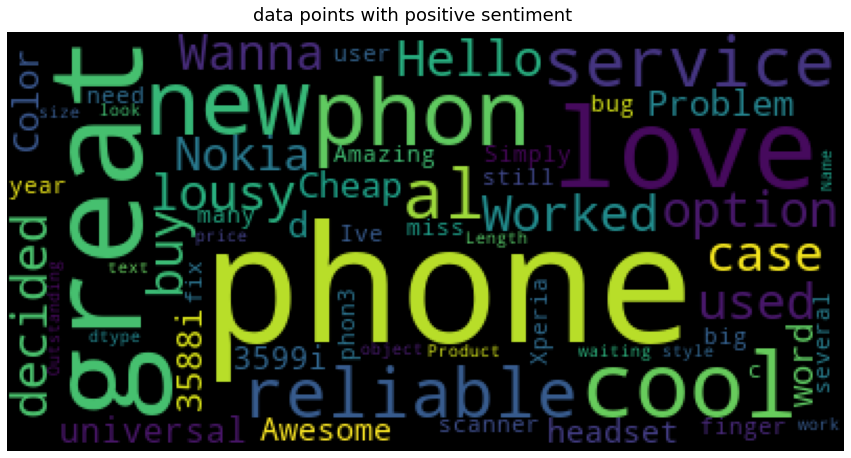

In [77]:
# plot word cloud for training data with positive examples
plot_wordcloud(df1[df1['rate'] == 'POSITIVE']['text'], 'data points with positive sentiment')

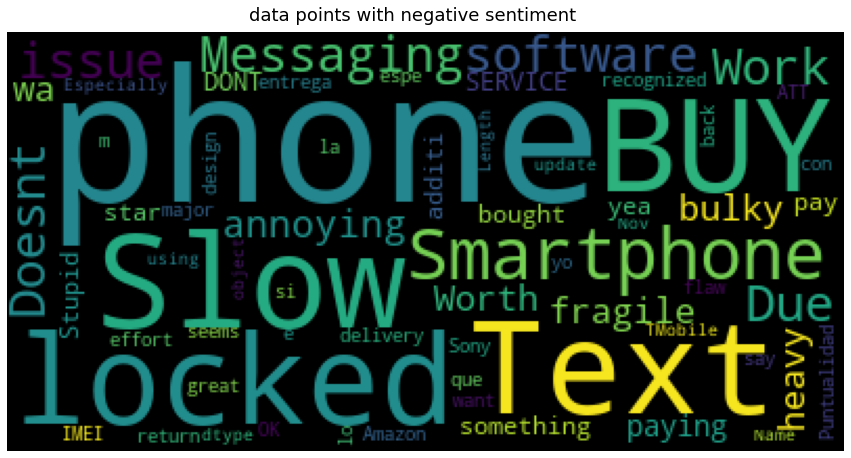

In [78]:
# plot word cloud for training data with negative examples
plot_wordcloud(df1[df1['rate'] == 'NEGATIVE']['text'], 'data points with negative sentiment')

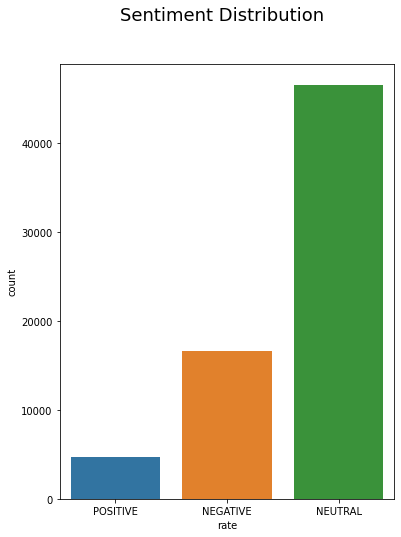

In [79]:
fig = plt.figure(figsize=[6,8])
plt.suptitle('Sentiment Distribution', fontsize=18)
ax = sns.countplot(data=df1,x='rate')
ax.set_xticklabels(['POSITIVE', 'NEGATIVE','NEUTRAL'])
plt.show()

In [80]:
WordCloud(df1[df1['rate'] == 'POSITIVE']['text'])

#TFIdf1 VECTORIZATION

In [81]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,ENGLISH_STOP_WORDS

In [82]:
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,1), max_features=400).fit(df1.text)

In [83]:
vect

TfidfVectorizer(max_features=400,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [84]:
x = vect.transform(df1.text)

In [85]:
x

<67956x400 sparse matrix of type '<class 'numpy.float64'>'
	with 877522 stored elements in Compressed Sparse Row format>

In [86]:
X = pd.DataFrame(x.toarray(),columns=vect.get_feature_names_out())

In [87]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [88]:
X

,10,100,30,4g,able,absolutely,account,activate,actually,advertised,ago,amazing,amazon,android,app,apple,apps,area,arrived,att,available,away,awesome,bad,basic,battery,beautiful,best,better,big,bit,black,bluetooth,bought,box,brand,broken,budget,build,button,buy,buying,cable,called,calling,came,camera,card,carrier,case,cell,change,charge,charged,charger,charging,cheap,clear,color,come,company,compared,compatible,complaint,completely,condition,connect,contact,cool,cost,couple,cover,customer,data,day,deal,decent,decided,defective,definitely,described,description,design,device,didnt,different,disappointed,display,doe,doesnt,dont,drop,dropped,easily,easy,edge,el,email,en,end,especially,exactly,excelente,excellent,expect,expected,expensive,experience,extra,extremely,fact,factory,fantastic,far,fast,faster,feature,feel,finally,fine,finger,fingerprint,fit,fix,flagship,free,fully,function,galaxy,game,getting,gift,glass,going,good,google,got,great,ha,half,hand,happy,hard,hardware,havent,headphone,hear,heavy,help,high,highly,hold,home,hour,huawei,huge,id,ill,im,instead,international,internet,iphone,isnt,issue,item,ive,jack,just,know,la,large,later,le,left,let,life,light,like,line,little,live,lo,locked,long,longer,look,looked,looking,lot,love,loved,low,lte,lumia,make,making,market,maybe,mean,memory,message,minute,mobile,mode,model,money,month,moto,motorola,music,muy,need,needed,network,new,nice,nokia,note,number,ok,old,open,option,order,ordered,original,os,overall,owned,paid,pay,people,perfect,perfectly,performance,person,phone,photo,picture,pixel,place,plan,play,pleased,plus,pocket,point,poor,port,power,pretty,previous,price,probably,problem,processor,product,protector,purchase,purchased,quality,que,quick,quickly,quite,ram,read,reader,real,really,reason,receive,received,reception,recommend,refurbished,repair,replace,replaced,replacement,reset,return,returned,review,right,run,running,s4,s6,s7,said,samsung,satisfied,say,scratch,screen,sd,second,seller,send,sensor,sent,service,set,setting,shipping,signal,sim,simple,size,slow,small,smart,smartphone,smooth,software,solid,sony,sound,speaker,speed,sprint,star,stars,start,started,stopped,storage,store,super,support,sure,switch,taking,talk,tell,terrible,text,thank,thanks,thats,thing,think,thought,time,tmobile,told,took,touch,tried,try,trying,turn,turned,unless,unlock,unlocked,update,upgrade,usb,use,used,user,using,value,verizon,version,video,voice,volume,wa,want,wanted,warranty,wasnt,waste,water,way,week,went,wife,wifi,window,windows,wireless,wish,wont,work,worked,working,works,worst,worth,wouldnt,wrong,xperia,year,yes,youre
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.122636,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.104695,0.0,0.071975,0.0,0.091656,0.0,0.000000,0.117309,0.0,0.0,0.089247,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.210914,0.0,0.0,0.100792,0.0,0.0,0.0,0.130012,0.00000,0.000000,0.000000,0.000000,0.135462,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.121095,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.098503,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.091874,0.0,0.000000,0.000000,0.133347,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.063356,0.0,0.000000,0.114843,0.077729,0.000000,0.0,0.0,0.126481,0.0,0.0,0.000000,0.137036,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.137309,0.0,0.0,0.0,0.0,0.087241,0.0,0.072612,0.0,0.00000,0.0,0.0,0.0,0.111546,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.075998,0.092877,0.120180,0.0,0.000000,0.0,0.208404,0.0,0.000000,0.0,0.0,0.0,0.0,0.112594,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.328774,0

In [89]:
X.shape

(67956, 400)

In [90]:
y = df1['rate'].map({'NEGATIVE': 0,'POSITIVE' : 1, 'NEUTRAL': 2})

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [95]:
X_test.shape

(13592, 400)

In [96]:
X_test

,10,100,30,4g,able,absolutely,account,activate,actually,advertised,ago,amazing,amazon,android,app,apple,apps,area,arrived,att,available,away,awesome,bad,basic,battery,beautiful,best,better,big,bit,black,bluetooth,bought,box,brand,broken,budget,build,button,buy,buying,cable,called,calling,came,camera,card,carrier,case,cell,change,charge,charged,charger,charging,cheap,clear,color,come,company,compared,compatible,complaint,completely,condition,connect,contact,cool,cost,couple,cover,customer,data,day,deal,decent,decided,defective,definitely,described,description,design,device,didnt,different,disappointed,display,doe,doesnt,dont,drop,dropped,easily,easy,edge,el,email,en,end,especially,exactly,excelente,excellent,expect,expected,expensive,experience,extra,extremely,fact,factory,fantastic,far,fast,faster,feature,feel,finally,fine,finger,fingerprint,fit,fix,flagship,free,fully,function,galaxy,game,getting,gift,glass,going,good,google,got,great,ha,half,hand,happy,hard,hardware,havent,headphone,hear,heavy,help,high,highly,hold,home,hour,huawei,huge,id,ill,im,instead,international,internet,iphone,isnt,issue,item,ive,jack,just,know,la,large,later,le,left,let,life,light,like,line,little,live,lo,locked,long,longer,look,looked,looking,lot,love,loved,low,lte,lumia,make,making,market,maybe,mean,memory,message,minute,mobile,mode,model,money,month,moto,motorola,music,muy,need,needed,network,new,nice,nokia,note,number,ok,old,open,option,order,ordered,original,os,overall,owned,paid,pay,people,perfect,perfectly,performance,person,phone,photo,picture,pixel,place,plan,play,pleased,plus,pocket,point,poor,port,power,pretty,previous,price,probably,problem,processor,product,protector,purchase,purchased,quality,que,quick,quickly,quite,ram,read,reader,real,really,reason,receive,received,reception,recommend,refurbished,repair,replace,replaced,replacement,reset,return,returned,review,right,run,running,s4,s6,s7,said,samsung,satisfied,say,scratch,screen,sd,second,seller,send,sensor,sent,service,set,setting,shipping,signal,sim,simple,size,slow,small,smart,smartphone,smooth,software,solid,sony,sound,speaker,speed,sprint,star,stars,start,started,stopped,storage,store,super,support,sure,switch,taking,talk,tell,terrible,text,thank,thanks,thats,thing,think,thought,time,tmobile,told,took,touch,tried,try,trying,turn,turned,unless,unlock,unlocked,update,upgrade,usb,use,used,user,using,value,verizon,version,video,voice,volume,wa,want,wanted,warranty,wasnt,waste,water,way,week,went,wife,wifi,window,windows,wireless,wish,wont,work,worked,working,works,worst,worth,wouldnt,wrong,xperia,year,yes,youre
12203,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.287583,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.184458,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.163301,0.0,0.0,0.0,0.00000,0.164078,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.138995,0.0,0.0,0.0,0.187552,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146915,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.130154,0.083239,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.175494,0.132748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158864,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127712,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.18542,0.0,0.0,0.0,0.0,0.0,0.

In [97]:
z =vect.inverse_transform(X_test)

In [98]:
z

[array(['android', 'away', 'big', 'box', 'card', 'change', 'didnt', 'got',
        'great', 'isnt', 'issue', 'like', 'phone', 'really', 'replace',
        'right', 'screen', 'setting', 'sim', 'software', 'start',
        'started', 'stopped', 'time', 'wa', 'worked', 'working'],
       dtype='<U13'),
 array(['great', 'nice'], dtype='<U13'),
 array(['excellent', 'product'], dtype='<U13'),
 array(['advertised', 'arrived', 'condition', 'excellent', 'product',
        'stars', 'wa'], dtype='<U13'),
 array(['big', 'button', 'came', 'card', 'deal', 'easily', 'good', 'got',
        'great', 'home', 'iphone', 'looking', 'minute', 'new', 'phone',
        'refurbished', 'samsung', 'scratch', 'sent', 'small', 'user',
        'verizon', 'works'], dtype='<U13'),
 array(['ago', 'big', 'button', 'buy', 'dont', 'easy', 'fast', 'feature',
        'fix', 'game', 'getting', 'good', 'got', 'great', 'ha',
        'headphone', 'id', 'ill', 'im', 'ive', 'know', 'let', 'like',
        'long', 'making', 'mean',

In [99]:
ypred

array([0, 1, 1, ..., 1, 1, 1])

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score

In [101]:
accuracy_score(ypred,y_test)

0.8454973513831666

In [102]:
precision_score(ypred,y_test,average='weighted')

0.9056477078917119

In [103]:
recall_score(ypred,y_test,average='weighted')

0.8454973513831666

In [104]:
f1_score(ypred,y_test,average='weighted')

0.8738439391207341

In [105]:
confusion_matrix(ypred,y_test)

array([[2647,  462,  402],
       [ 642, 8824,  554],
       [  12,   28,   21]])

#RANDOM FOREST

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [107]:
rf = RandomForestClassifier()

In [108]:
rf1 = RandomForestClassifier(n_estimators=100,max_depth=20)
rf1.fit(X_train, y_train.values.ravel())
rf2 = RandomForestClassifier(n_estimators=200,max_depth=None)
rf2.fit(X_train, y_train.values.ravel())
rf3 = RandomForestClassifier(n_estimators=5,max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=5)

In [109]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

for mdl in [rf1,rf2,rf3]:
    y_pred3 = mdl.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred3)
    precision = precision_score(y_test,y_pred3,average='weighted')
    recall = recall_score(y_test,y_pred3,average='weighted')
    f_score = f1_score(y_pred3,y_test,average='weighted')
    c_matrix = confusion_matrix(y_test,y_pred3)
    print(accuracy,precision,recall,f_score,c_matrix)

0.8062831077104179 0.8246706686374703 0.8062831077104179 0.8467960192229733 [[1812 1489    0]
 [ 170 9144    0]
 [ 161  813    3]]
0.851824602707475 0.844334227075674 0.851824602707475 0.876876658316768 [[2631  657   13]
 [ 427 8877   10]
 [ 332  575   70]]
0.8254120070629782 0.8012655028116086 0.8254120070629782 0.8464970200320135 [[2558  691   52]
 [ 672 8588   54]
 [ 344  560   73]]


#ADABOOST

In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
adaboost = AdaBoostClassifier(n_estimators=200,learning_rate=1)

In [112]:
adamodel = adaboost.fit(X_train, y_train)

In [113]:
y_pred4 = adamodel.predict(X_test)

In [114]:
accuracy_score(y_pred4,y_test)

0.8373307828134197

In [115]:
precision_score(y_pred4,y_test,average='weighted')

0.8912114495381882

In [116]:
recall_score(y_pred4,y_test,average='weighted')

0.8373307828134197

In [117]:
f1_score(y_pred4,y_test,average='weighted')

0.8623082820590896

In [118]:
confusion_matrix(y_pred4,y_test)

array([[2570,  498,  398],
       [ 688, 8769,  537],
       [  43,   47,   42]])

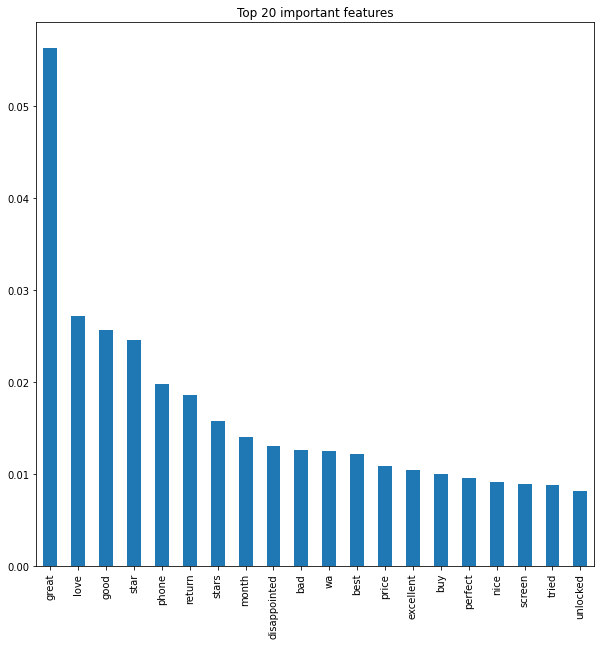

In [119]:
feat_importances = pd.Series(rf3.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()